In [138]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils import resample

In [102]:
df1 = pd.read_csv("bangladeshi_all_engish_newspapers_daily_news_combined_dataset.csv")
df2 = pd.read_csv("IFND.csv", encoding="iso-8859-1")
df3 = pd.read_csv("train.csv")
df4 = pd.read_csv("test.csv")
df5 = pd.read_csv('spam.csv', encoding='iso-8859-1')

In [103]:
df1['label'] = 0
df1.head()

,Unnamed: 0,title,text,publish_date,urls,news_collection_time,publisher,label
0,0,Studio planning reboot of show that hasn’t bee...,As studios across the industry have started to...,2023-05-17 17:10:54,https://www.thedailystar.net/shout/news/studio...,2023-05-18 10:18:11,thedailystar,0
1,1,Critical thinking in our curriculum: Too much ...,Critical thinking has always been emphasised h...,2023-05-18 00:00:00,https://www.thedailystar.net/shout/news/critic...,2023-05-18 10:18:12,thedailystar,0
2,2,The waffle-on-a-stick revolution,Waffles on a stick are popping up at every cor...,2023-05-18 00:00:00,https://www.thedailystar.net/shout/news/the-wa...,2023-05-18 10:18:13,thedailystar,0
3,3,The Setting Sun: Dazai’s depiction of the dusk...,*Trigger Warning: The following contains menti...,2023-05-17 09:31:25,https://www.thedailystar.net/shout/news/the-se...,2023-05-18 10:18:14,thedailystar,0
4,4,5 books exploring the found-family trope in fi...,A cast of strangers come together as a family ...,2023-05-17 12:55:00,https://www.thedailystar.net/daily-star-books/...,2023-05-18 10:18:15,thedailystar,0


In [104]:
df1 = df1[['text','label']]

In [105]:
df2.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


In [106]:
df2 = df2[['Statement','Label']]
df2.rename(columns = {'Statement':'text', 'Label':'label'}, inplace=True)

In [107]:
df2.label = 0

In [108]:
df3.head()

,title,author,text,label,Unnamed: 4,Unnamed: 5
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,NaN,NaN
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,NaN,NaN
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,NaN,NaN
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,NaN,NaN
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,NaN,NaN


In [109]:
df3 = df3[['text','label']]
df4 = df4[['text','label']]

df3 = df3.loc[(df3['label'] == '0') | (df3['label'] == '1')]
df4 = df4.loc[(df4['label'] == '0') | (df4['label'] == '1')]

df3.label = df3['label'].astype(int)
df4.label = df4['label'].astype(int)

In [110]:
df5 = df5[df5.v1 == 'spam']

In [111]:
df5.rename(columns={'v1':'label','v2':'text'},inplace=True)
df5.label = 1
df5 = df5[['label','text']]

In [112]:
df = pd.concat([df1,df2,df3,df4,df5], axis=0)

In [113]:
df.head()

,text,label
0,As studios across the industry have started to...,0
1,Critical thinking has always been emphasised h...,0
2,Waffles on a stick are popping up at every cor...,0
3,*Trigger Warning: The following contains menti...,0
4,A cast of strangers come together as a family ...,0


<AxesSubplot:>

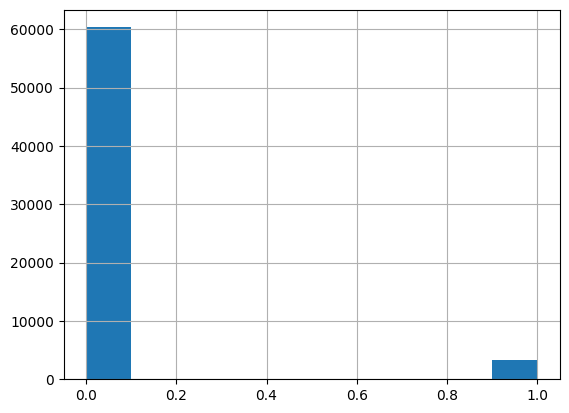

In [114]:
df.label.hist()

In [115]:
df.isnull().sum()

text     11
label     0
dtype: int64

In [116]:
df = df.fillna(" ")

In [117]:
def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove special characters and punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        # Join the cleaned words back into a string
        cleaned_text = ' '.join(words)
        return cleaned_text
    else:
        return ''

In [118]:
df['text'] = df['text'].apply(clean_text)

In [139]:
maj  = df[df.label == 0]
min = df[df.label == 1]

maj.shape, min.shape

((60337, 2), (3272, 2))

In [144]:
min_upsampled = resample(min, replace=True, n_samples = 15000, random_state=42)

In [145]:
min_upsampled.tail()

,text,label
3999,2nd time tried contact u u å400 prize 2 claim ...,1
192,media skeptic postmaidan ukraine become full f...,1
144,google pinterest digg linkedin reddit stumbleu...,1
531,julian assange october surprise revealed 10282...,1
849,share facebook hillarys emails truly gifts kee...,1


In [146]:
new_df = pd.concat([maj,min_upsampled])

In [147]:
new_df.label.value_counts()

0    60337
1    15000
Name: label, dtype: int64

In [148]:
X = new_df['text']
y = new_df['label']

In [149]:
train_text, test_text, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [150]:
tf = TfidfVectorizer(stop_words='english', max_features=7000)
Xtrain = tf.fit_transform(train_text)
Xtest = tf.transform(test_text)

In [151]:
nb = MultinomialNB()
nb.fit(Xtrain,ytrain)

lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

svm = SVC()
svm.fit(Xtrain, ytrain)

SVC()

In [152]:
#performance evaluation
pred_nb = nb.predict(Xtrain)
pred_lr = lr.predict(Xtrain)
pred_svm = svm.predict(Xtrain)

print('Naive Bayes train accuray: ', f1_score(ytrain,pred_nb))
print('Logistic Regression train accuray: ', f1_score(ytrain,pred_lr))
print('SVM train accuray: ', f1_score(ytrain,pred_svm))

Naive Bayes train accuray:  0.8830864245788218
Logistic Regression train accuray:  0.9551887782957458
SVM train accuray:  0.9973496769918833


In [153]:
pred = svm.predict(val_vec)
pred

array([0, 0, 0], dtype=int64)

In [155]:
np.unique(pred_svm, return_counts=True)

(array([0, 1], dtype=int64), array([48171, 12098], dtype=int64))

In [156]:
#performance evaluation
pred_nb = nb.predict(Xtest)
pred_lr = lr.predict(Xtest)
pred_svm = svm.predict(Xtest)

print('Naive Bayes test accuray: ', f1_score(ytest,pred_nb))
print('Logistic Regression test accuray: ', f1_score(ytest,pred_lr))
print('SVM test accuray: ', f1_score(ytest,pred_svm))

Naive Bayes test accuray:  0.8751197700415203
Logistic Regression test accuray:  0.936426116838488
SVM test accuray:  0.9873843566021868


In [157]:
np.unique(pred_svm, return_counts=True)

(array([0, 1], dtype=int64), array([12073,  2995], dtype=int64))

In [158]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tf, f)
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)
with open('clean_text.pkl', 'wb') as f:
    pickle.dump(clean_text, f)